In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [13]:
DATASETS_PATH = '../dataset/5_processed_full/'

In [14]:
def load_data(filename_train, filename_test, filename_val):
    """
    Load train, test and validation sets from file

    Args:
        filename_train : Name of the file from which the train data is to be loaded
        filename_test : Name of the file from which the test data is to be loaded
        filename_val : Name of the file from which the validation data is to be loaded
    
    Returns:
        train_tweet_X: list of tweets from train data
        train_tweet_Y: list of lables correponding to each tweet from train data
        test_tweet_X: list of tweets from test data
        test_tweet_Y: list of lables correponding to each tweet from test data
        val_tweet_X: list of tweets from validation data
        val_tweet_Y: list of lables correponding to each tweet from validation data
    """
    train = pd.read_csv(filename_train)
    test = pd.read_csv(filename_test)
    val = pd.read_csv(filename_val)
    
    return train['Text'].tolist(), train['Label'].tolist(), test['Text'].tolist(), test['Label'].tolist(), val['Text'].tolist(), val['Label'].tolist()

In [15]:
# LOADING TRAIN, TEST AND VALIDATION SETS

train_tweet_X, train_tweet_Y, test_tweet_X, test_tweet_Y, val_tweet_X, val_tweet_Y = load_data(DATASETS_PATH + 'train.csv', DATASETS_PATH + 'test.csv', DATASETS_PATH + 'val.csv')

print("Train length: \t", len(train_tweet_X))
print("Test length: \t", len(test_tweet_X))
print("Val length: \t", len(val_tweet_X))

Train length: 	 46996
Test length: 	 13823
Val length: 	 8294


In [16]:
def preprocessing(tweets):
    """
    Perform preprocessing of the tweets

    Args:
        tweets : list of tweets
    
    Returns:
        result: preprocessed list of tweets
    """
    #set of stopwords
    stop_words = set(stopwords.words('english'))
    
    result = []
    for tweet in tweets:
        
        #tokenizing each tweet
        tokens = word_tokenize(tweet)
        
        #removing stopwords
        stopwords_removed_tokens = []
        for word in tokens:
            if word not in stop_words:
                stopwords_removed_tokens.append(word)
        
        result.append(stopwords_removed_tokens)
    
    return result

In [17]:
# PREPROCESSING TRAIN, TEST AND VALIDATION TWEETS

train_tweet_X = preprocessing(train_tweet_X)
test_tweet_X = preprocessing(test_tweet_X)
val_tweet_X = preprocessing(val_tweet_X)

In [18]:
# TFIDF VECTORIZER

# Helper function
def do_nothing(x):
    return x

def create_features(train_tweet_X, train_tweet_Y, test_tweet_X, test_tweet_Y, val_tweet_X, val_tweet_Y):
    
    tfidf = TfidfVectorizer(analyzer='word', tokenizer=do_nothing, preprocessor=do_nothing, token_pattern=None)
    
    train_tweet_Y = np.array(train_tweet_Y)
    test_tweet_Y = np.array(test_tweet_Y)
    val_tweet_Y = np.array(val_tweet_Y)
    train_tweet_X = tfidf.fit_transform(train_tweet_X)
    test_tweet_X = tfidf.transform(test_tweet_X)

    return (train_tweet_X, train_tweet_Y, test_tweet_X, test_tweet_Y, val_tweet_X, val_tweet_Y)

In [19]:
train_tweet_X, train_tweet_Y, test_tweet_X, test_tweet_Y, val_tweet_X, val_tweet_Y = create_features(train_tweet_X, train_tweet_Y, test_tweet_X, test_tweet_Y, val_tweet_X, val_tweet_Y)

In [20]:
# Create a linear NB classifier 
classifier = MultinomialNB()

# Train classifier 
classifier.fit(train_tweet_X, train_tweet_Y)

predictions = classifier.predict(test_tweet_X)

print("Accuracy: {}%".format(classifier.score(test_tweet_X, test_tweet_Y) * 100 ))

Accuracy: 73.45728134268971%


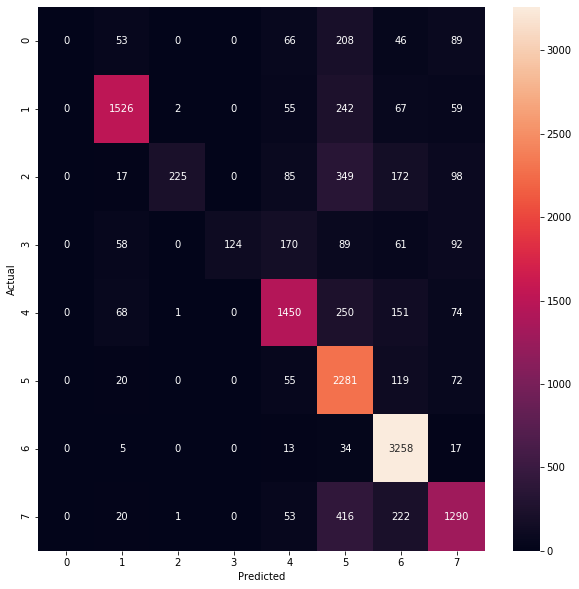

In [21]:
# Plotting Confusion Matrix

conf_mat = confusion_matrix(test_tweet_Y, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
# Classification Report

print(classification_report(test_tweet_Y, predictions))

                precision    recall  f1-score   support

bbhuttozardari       0.00      0.00      0.00       462
 fawadchaudhry       0.86      0.78      0.82      1951
  imrankhanpti       0.98      0.24      0.38       946
   marvi_memon       1.00      0.21      0.35       594
 maryamnsharif       0.74      0.73      0.74      1994
  mjibrannasir       0.59      0.90      0.71      2547
  narendramodi       0.80      0.98      0.88      3327
  sherryrehman       0.72      0.64      0.68      2002

      accuracy                           0.73     13823
     macro avg       0.71      0.56      0.57     13823
  weighted avg       0.74      0.73      0.70     13823



/home/farhan/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Note:
The precision, recall and f1-score for "bbhuttozardari" is 0 because this label was never predicted. i.e the model didn't predict any tweet to be from "bbhuttozardari".